# Regression
Regression is used when prediction a continuous dependent variable using one ore more independent variables.

## Linear regression
### Ordinary Least Mean Squares using p-features
$$
    \hat{y}_i = \beta_1 x_{i,1} + \beta_2 x_{i,2} + \beta_3 x_{i,3} + \cdots + \beta_p x_{i,p} + \epsilon_i
$$

Cost function to be minimized (square error):
$$
   Obj(\Theta) = L(\Theta) = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$


- Classic regression, usually the first choice
- Does not work well when **p is large** and there is **noise** in the training data
- The 

$$  \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2, ..., \beta_n x_n + \epsilon$$

In 1-dimensional case, the regression is simply

$$  \hat{y} = \beta_0 + \beta_1 x + \epsilon$$,

where $\beta_1$ is the reciprocal and $\beta_0$ is the constant (the y-axis crossing point) and $\epsilon$ is the prediction error. The optimal solution is when the squared sum of error (Loss function, $L()$) between predicted and true values is minimized:

$$
   L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

The linear regression has a well known solution, which can be calculated very efficiently (closed form):

$$
   \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T Y,
$$

Where $\mathbf{X}$ is a design matrix containing data samples in rows, and variables in columns. It is also called as design matrix, at it was shown in the top of this section.


## The fitness of a regression model

The fitness of a regression model is often estimated using coefficient of determination ($R^2$) or Root Mean Square Error of prediction (RMSE).

### Coefficient of determination, $R^2$
The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), $R^2$, defines how large proportion of the variance in $y$ is explained by the model. $R^2$ is zero if the model cannot predict anything and it is 1 when the model fit is perfect. 

$$
    R^2 = 1- \frac{\mathrm{var(residual)}}{\mathrm{var}(y)} = 1- \frac{\Sigma_{i=1}^{n} (y_i - \hat{y}_i)^2}{\Sigma_{i=1}^{n} (y_i - \bar{y})^2}
$$

For Ordinary Least mean Squares regression models (OLS) it is the same as the square of the Pearson correlation coefficient.

$$
   R^2 = \rho^2
$$

### Root Mean Square Error, RMSE
[RMSE](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e), is another often used measure for model fitness. RMSE shows the average prediction error in the same units and scale than $y$.

$$
   \mathrm{RMSE} = \sqrt{ \left( \frac{\sum_{i=i}^{n} (y_i - \hat{y}_i)^2}{n} \right) }
$$

## Regularization and model simplicication
![William_of_Ockham_-_Logica_1341.jpg](kuvat/William_of_Ockham_-_Logica_1341_s.jpg)

<span id="kuvaviite">Ockham - from a manuscipt of Ockham's Summa Logicae, MS Gonville and Caius College, Cambridge, 464/571, fol. 69r</span>

> "Simpler solutions are more likely to be correct than complex ones"
>
        >William of Ockham


Finding a model which fits to the data is not necessarily optimal. It may be unnecessary complex, which can cause problems in:
 - Generalization: too complex models may have unnecessary complex decision boundary or use redundant or unimportant variables in a regression model, which are producing noise to the model. The model may event fit to the noise in the training data, which is not repeated similarly in new samples.
 - Explainability: A complex model is difficult to understand, explain and believe.
 - Stability: Too complex model may have problems in converging in noisy training data and also the prediction can be too noise sensitive
 - Unnecessary high dimensionality means costs in recording, transferring, storing and processing data

Therefore it is important to use means for simplifying data and making the models more stable.

### Regularization
Can you solve the following system of equations?
$$
\begin{cases} 3x + y + z = 5\\ 8x – 4y =  4z\end{cases}
$$

The equation system is underdetermined, and there it does not have unique solution. You can solve it by adding some additional information:
$$
   z=0 \rightarrow x=1, y=2
$$

Or add an additional requirement:
$$
   \min (x^2 + y^2 + z^2)
$$

Text(0, 0.5, '$x^2 + y^2 + z^2$')

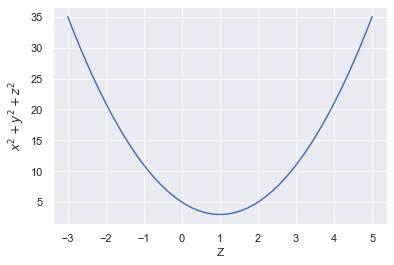

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

z=np.linspace(-3,5)
y=2-z
x=1
plt.plot(z, x**2+y**2+z**2)
plt.xlabel('Z')
plt.ylabel('$x^2 + y^2 + z^2$')

With this contraint, the optimal solution is:

$$
\begin{cases} x = 1\\ y=1 \\ z=1\end{cases}
$$

<div class="laatikko">Regularization is a method in adding information (requirement) to solve a system or to avoid overfitting by reducing degrees of freedom.</div>

#### L2 regularization, Ridge regression
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \underbrace{\lambda \sum_{j=1}^p \beta_j^2}_{\Omega(\Theta)}
$$

* Regularization term, $\Omega(\Theta)$, makes it suitable for higher dimensional data
* Minimal unbiased estimator in certain cases
* Can be solved in closed form
* All coefficients are always kept -> **Does not provide a parsimonious model**

-------
<div class=citation>
Hoerl, Arthur E., ja Robert W. Kennard. ”Ridge Regression: Biased Estimation for Nonorthogonal Problems”. Technometrics 12, nro 1 (1. Feb 1970): 55–67. https://doi.org/10.1080/00401706.1970.10488634.
</div>

#### L1 regularization, LASSO
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p |\beta_j|
$$

* L1 regularization tends to lead solutions where many coefficients, $\beta_i$ will be zeros -> **sparse model**.
* Only iterative solutions are available, but for example <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">Least Angle Regression</a> (LARS) is fast method for finding LASSO solution
* Will saturate if p>n, and select at maximum n feautures
* in cases where n>p and high correlation between predictors, L1 is worse than L2

-----
<div class="citation">Tibshirani, Robert. ”Regression Shrinkage and Selection Via the Lasso”. Journal of the Royal Statistical Society: Series B (Methodological) 58, nro 1 (1996): 267–88. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x.
</div>

#### Elastic nets
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p \left( (1-\alpha) \beta_i^2 + \alpha |\beta_j| \right)
$$

* Elastic net can perform like Rigde regression, when $\alpha$=0 or like LASSO when $\alpha$=1
* For suitable value of, $\alpha$, elastic net will also produce sparse model, but it does not saturate to in cases when n<p like LASSO.
* Can tolerate correlation between predictors
* Can be computed interatively quite efficiently



<div class="citation">Zou, Hui, ja Trevor Hastie. ”Regularization and variable selection via the elastic net”. Journal of the Royal Statistical Society: Series B (Statistical Methodology) 67, nro 2 (1. April 2005): 301–20. https://doi.org/10.1111/j.1467-9868.2005.00503.x.</div>


#### Gradient Tree Boosting 
 - Also called as Gradient Boosted Regression Trees (GBRT)
 - The GBRT has similar formal loss function and measure for complexity as linear regrssion
 
 $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$
 
 

### Boston house prizes example

Can the house prizes be predicted? Which parameters affect most to the house prizes?

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per \$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [60]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

boston=load_boston()
# Scaling is not necessary, but can be done
#X= scaler.fit_transform(boston['data'])
X= boston['data']
y= boston['target']
Boston = pd.DataFrame(data=X, columns=boston['feature_names'])
Boston['target'] = y
print(Boston.shape)
Boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CV score.......... 0.35327592439586986
Training score.... 0.7406426641094095


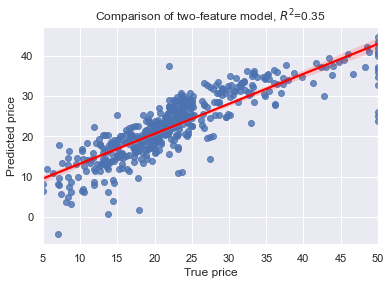

In [80]:
# Ordinary Linear Regression First
lr=LinearRegression()
lr.fit(X,y)
yhat=lr.predict(X)

# Cross_val_score and score are coefficient of determinations, R^2
RsquaredCV=cross_val_score(lr, X, y, cv=5).mean()
RsquaredTR=lr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.4208650472561192
Training score.... 0.7322780558411127


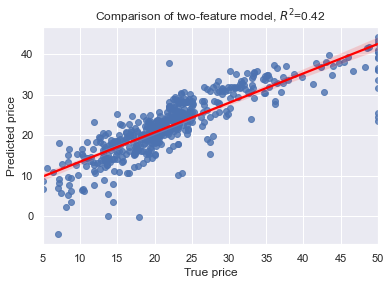

In [83]:
# Then L2 regularized Ridge Regression
rr=Ridge(alpha=8)
rr.fit(X,y)
yhat=rr.predict(X)
RsquaredCV=cross_val_score(rr, X, y, cv=5).mean()
RsquaredTR=rr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.4304503842552162
Training score.... 0.7140164719858566


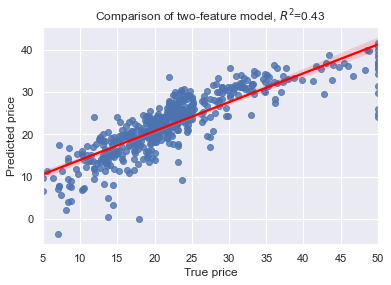

In [86]:
# L1 regularized Lasso Regerssion
la=Lasso(alpha=0.5)
la.fit(X,y)
yhat=la.predict(X)
RsquaredCV=cross_val_score(la, X, y, cv=5).mean()
RsquaredTR=la.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.4850356472029464
Training score.... 0.7056176997612844


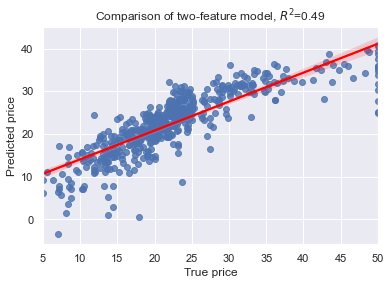

In [90]:
# L2 + L1 regularized Elastic Net
en=ElasticNet(alpha=0.5)
en.fit(X,y)
yhat=en.predict(X)
RsquaredCV=cross_val_score(en, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

In [91]:
# Lets use Elastic Net for selecting the most relevant features
#model = LassoCV(cv=5)
model = ElasticNetCV(cv=5)

sfm = SelectFromModel(model, threshold=0.3)
sfm.fit(X, y)

print(sfm.transform(X).shape)
print("Selected variables are", sfm.transform([boston['feature_names'], boston['feature_names']])[0])
        

(506, 4)
Selected variables are ['RM' 'DIS' 'PTRATIO' 'LSTAT']


CV score.......... 0.3820025441846835
Training score.... 0.6820275797709414


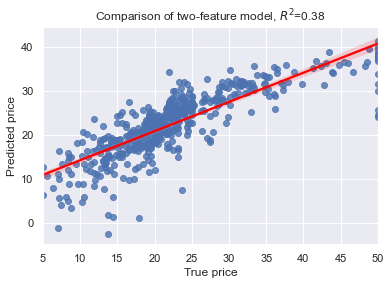

In [92]:
model.fit(sfm.transform(X), y)
yhat=model.predict(sfm.transform(X))
RsquaredCV=cross_val_score(model, sfm.transform(X), y, cv=5).mean()
RsquaredTR=model.score(sfm.transform(X),y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)

## Gradient tree regression

CV score.......... 0.7226106295652988
Training score.... 0.9710675283235342


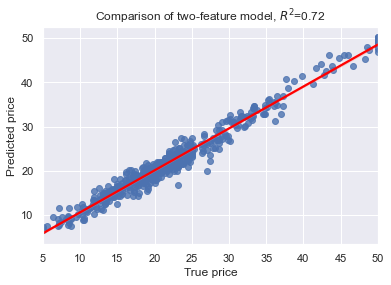

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
#                                max_depth=2, random_state=0, loss='ls')
est = GradientBoostingRegressor(max_features=3)
est.fit(X, y)
yhat=est.predict(X)
RsquaredCV=cross_val_score(est, X, y, cv=5).mean()
RsquaredTR=est.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

 0     CRIM= 0.05
 1       ZN= 0.01
 2    INDUS= 0.09
 3     CHAS= 0.01
 4      NOX= 0.06
 5       RM= 0.30
 6      AGE= 0.02
 7      DIS= 0.06
 8      RAD= 0.00
 9      TAX= 0.06
10  PTRATIO= 0.09
11        B= 0.02
12    LSTAT= 0.23


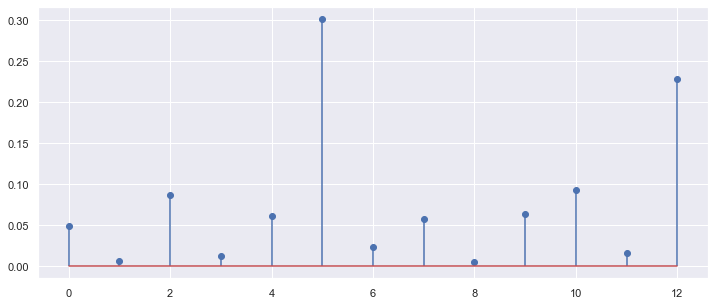

In [58]:
# Plot the importance of each feature
plt.figure(figsize=(12,5))
#Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)
i=range(len(boston.feature_names))
plt.stem(est.feature_importances_)
ax=plt.gca()
#ax.set_xticklabels(boston.feature_names);

for i in range(len(boston.feature_names)):
    print("%2d %8s=%5.2f" % (i,boston.feature_names[i], est.feature_importances_[i]))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


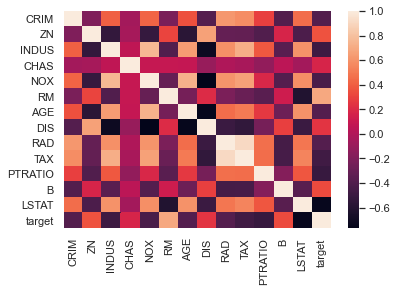

In [59]:
sns.heatmap(Boston.corr())
Boston.corr()


[ 5 12  2]
(506, 3)
CV score.......... 0.5637866622766463
Training score.... 0.9304873266368128


GradientBoostingRegressor()

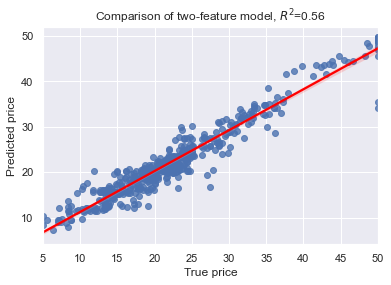

In [94]:
selected=est.feature_importances_.argsort()[-1:-4:-1]
print(selected)

Xs=X[:,selected]
print(Xs.shape)

ests = GradientBoostingRegressor()
ests.fit(Xs, y)
yhat=ests.predict(Xs)
RsquaredCV=cross_val_score(ests, Xs, y, cv=5).mean()
RsquaredTR=ests.score(Xs,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
ests


## Recursive feature elimination

Needs to be written...